In [12]:
from scipy import stats
import pandas as pd
drinks = pd.read_csv('drinks.csv')
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.info

<bound method DataFrame.info of          country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol continent  
0                             0.0        AS  
1                             4.9        EU  
2                        

In [13]:
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']
# 두집단간 평균의 차이
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var = False)

In [14]:
# 두집단의 분산이 같다 가설
print(tTestResult)

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)


In [15]:
# 두집단의 분산이 다르다 가설
print(tTestResultDiffVar)

Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)


- t-statistic : 평균차이, 음수 : 뒤쪽 데이터의 평균 큰 경우, 검정 통계
- p-value : 유의확률, 결과가 0, 두집단의 평균이 같지 않다. => 귀무가설이 기각, 맞다틀리다
- 귀무가설 : 현재가설이 맞지 않다를 증명 // 예상되는 가설
- 대립가설 : 귀무가설의 반대되는 가설,
- 아프리카와 유럽의 맥주소비량의 차이는 확률적으로 다르다
- => 통계적으로 유의미하다
-

In [16]:
# 대한민국은 얼마나 술을 독하게 마실까?
drinks['total_servings'] =  drinks['beer_servings'] + drinks['spirit_servings']+drinks['wine_servings']
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [17]:
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
# alcohol rate , 분모가 0이면 결측값이 생김
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
 6   total_servings                193 non-null    int64  
 7   alcohol_rate                  180 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.2+ KB


In [18]:
drinks['alcohol_rate'].fillna(0, inplace = True)
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
 6   total_servings                193 non-null    int64  
 7   alcohol_rate                  193 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.2+ KB


In [24]:
country_alcohol_rank = drinks[['country', 'alcohol_rate']]
country_alcohol_rank = country_alcohol_rank.sort_values(by = ['alcohol_rate'], ascending = False)

TypeError: can only concatenate str (not "int") to str

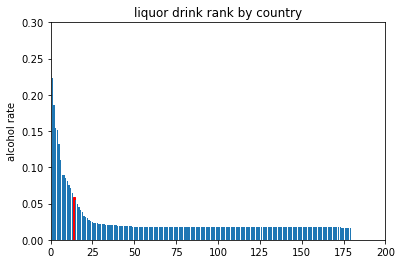

In [35]:
import numpy as np
import matplotlib.pyplot as plt
country_list = country_alcohol_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_alcohol_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index('South Korea')
korea_alc_rate = country_alcohol_rank[country_alcohol_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South korea :' + str(korea_rank) + 1, xy = (korea_rank,v  korea_alc_rate), 
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = 'red', shrink = 0.05))
plt.show()

In [ ]:
#  전체 소비량을 막대그래프로 작성
country_serving_rank = drinks[['country','total_servings']]
country_serving_rank = country_serving_rank.sort_values(by='', equal_var = False)
country_serving_rank

In [ ]:
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

In [37]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [39]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']


In [40]:
pip install pytagcloud pygame simplejson

  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759873 sha256=7dfcc7d20a98851e8a823e74d9ccd485692ddbfd7ac6c1d99f4d4eae246cccc0
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\be\9b\7d\911eafd2b3a1ab76aafb0d5929e7aede8db74f5436af7a2b9e
Successfully built pytagcloud
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install pytagcloud

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [13]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
path = "C:\\Users\\pc\\Desktop\\PYTHON\\PROJECT\\chromedriver.exe"
source_url = 'https://namu.wiki/RecentChanges'
driver = webdriver.Chrome(path)
driver.get(source_url)
# a_data = driver.find_elements_by_css_selector("table tr td a")
# data-v-2a7428fa
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
a_data = soup.find('a')
print(len(a_data))

page_urls = []
cnt = 0
for a in a_data :
    if a.get_attribute('href') == None :
        continue
    page_url = a.get_attribute('href')
    if "png" not in page_url :
        page_urls.append(page_url)
        cnt += 1
    if cnt > 10:
        break
# 중복제거
page_urls = list(set(page_urls))
for page in page_urls[:5] :
    print(page)
print("*************")
print(page_urls)
driver.close()        

0
*************
[]


In [2]:
import pandas as pd
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)
for page_url in page_urls :
    driver = webdriver.Chrome(path)
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    contents_table = soup.find(name = 'article')
    title = contents_table.find_all('h1')[0]
    if len(contents_table.find_all('ul')) > 0 :
        category = contents_table.find_all('ul')[0]
    else :
        category = None
    content_paragraphs = contents_table.find_all(name='div', attrs={'class':'wiki-paragraph'})
    content_corpus_list = []
    if title is not None :
        row_title = title.text.replace("\n", " ")
    else :
        row_title = ""
    if content_paragraphs is not None :
        for paragraphs in content_paragraphs :
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else :
                content_corpus_list.append("")
    else :
        content_corpus_list.append("")
    if category is not None :
        row_category = category.text.replace("\n", " ")
    else :
        row_category = ""
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index - df.columns)
    df = df.append(series, ignore_index = True)
    driver.close()

In [3]:
df.head()

,title,category,content_text


In [5]:
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-l가-힣]+')
    result = hangul.sub('', text)
    return result
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x : text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text


In [6]:
print(text_cleaning('漢자는 복잡하고, 한글은 smart하고 English ... 11111'))

자는 복잡하고 한글은 하고   


In [6]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [8]:
from konlpy.tag import Okt
from collections import Counter
nouns_tagger = Okt()

In [9]:
# 각 피처별 말뭉치 생성
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())

In [11]:
nouns = nouns_tagger.nouns(content_corpus)
nouns[:5]

[]

In [12]:
# 각단어의 빈도수를 딕셔너리로 계산
count = Counter(nouns)
count

Counter()

In [14]:
# 한글자 단어 제거하기
remove_char_counter = Counter({ x : count[x] for x in count if len(x) > 1 })
# x 단어
remove_char_counter

Counter()

In [23]:
# 불용어 제거 : 도저히 => 의미가 없음
korean_stopwords = "korean_stopwords.txt"
with open(korean_stopwords, encoding = "utf8") as f :
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
stopwords[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [24]:
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter()


In [27]:
# 워드클라우드 시각화
import pytagcloud
ranked_tag = remove_char_counter.most_common(40) # 가장많이쓰는 단어 40개
# remove_char_counter 단어 빈도수 저장, 단어길이가 두개이상, 불용어제거
ranked_tag # 단어 구름 시각화에 표시될 내용
taglist = pytagcloud.make_tags(ranked_tag, maxsize = 50)
# 저장
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg',
            size = (900, 600), fontname = 'NanumGothic',
            rectangular = False)

In [25]:
#다운로드 받은 폰트는 pytagcloud > fonts 에 파일 넣고
# fonts.json 파일을 메모장으로 열고 거기에 추가
# {
# 		"name": "NanumGothic",
# 		"ttf": "NanumGothic.ttf",
# 		"web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
# 	},

Note: you may need to restart the kernel to use updated packages.


In [28]:
# 생성된 이미지 콘솔출력
from IPython.display import Image
Image(filename = 'wordcloud.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'wordcloud.jpg'

In [1]:
#
import pandas as pd
cctv_seoul = pd.read_csv('01. CCTV_in_Seoul.csv', encoding = 'utf-8')
cctv_seoul.rename(columns ={'기관명':'구별'}, inplace = True)
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [2]:
pop_seoul = pd.read_excel('01. population_in_Seoul.xls',
                         header = 2, usecols = 'B, D, G, J, N')
pop_seoul.rename(columns = {pop_seoul.columns[0]:'구별', 
                           pop_seoul.columns[1]:'인구수', 
                           pop_seoul.columns[2]:'한국인', 
                           pop_seoul.columns[3]:'외국인', 
                           pop_seoul.columns[4]:'고령자'},
                            inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [3]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      26 non-null     object 
 1   인구수     26 non-null     float64
 2   한국인     26 non-null     float64
 3   외국인     26 non-null     float64
 4   고령자     26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [4]:
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] + 
                       cctv_seoul['2015년'] + cctv_seoul['2016년']) / \
                    cctv_seoul['2013년도 이전'] * 100
cctv_seoul.sort_values(by='최근증가율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [5]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] /pop_seoul['인구수']
pop_seoul['고령자비율'] = pop_seoul['고령자'] /pop_seoul['인구수']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,0.026539,0.129585
1,종로구,162820.0,153589.0,9231.0,25425.0,0.056695,0.156154
2,중구,133240.0,124312.0,8928.0,20764.0,0.067007,0.155839
3,용산구,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364
4,성동구,311244.0,303380.0,7864.0,39997.0,0.025266,0.128507


In [6]:
# 외국인비율 상위 5개
pop_seoul.sort_values(by = '외국인비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,0.086636,0.130062
18,금천구,255082.0,236353.0,18729.0,32970.0,0.073423,0.129253
17,구로구,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895
2,중구,133240.0,124312.0,8928.0,20764.0,0.067007,0.155839
3,용산구,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364


In [7]:
data_result = pd.merge(cctv_seoul, pop_seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


In [9]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


In [13]:
data_result.set_index('구별', inplace = True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


In [14]:
data_result.corr(method='pearson')

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
최근증가율,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


In [18]:
import numpy as np
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [17]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [19]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

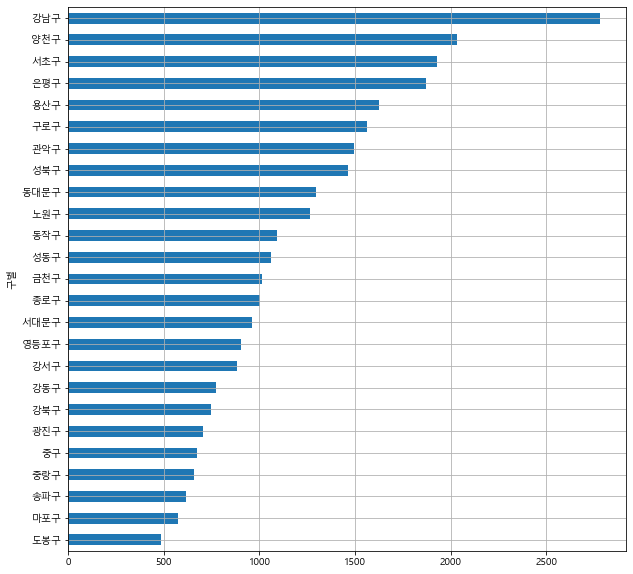

In [28]:
#matplot
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure()
plt.rc('font', family = 'Malgun Gothic')
data_result['소계'].sort_values(ascending = True).plot(kind='barh', grid=True, figsize = (10,10))
plt.show()

In [29]:
# 인구대비 cctv 비율컬럼
data_result['cctv비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553,0.284673


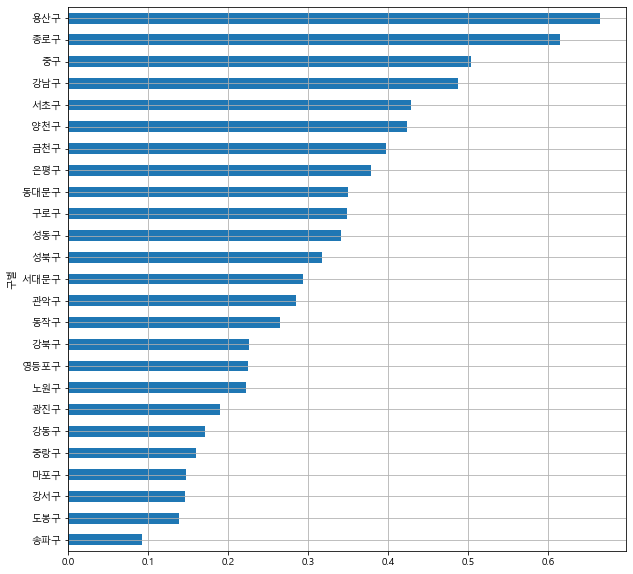

In [30]:
data_result['cctv비율'].sort_values().plot(kind='barh', grid = True, figsize = (10,10))
plt.show()

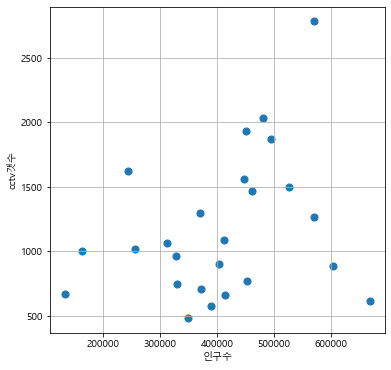

In [32]:
# 산점도
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s= 50)
plt.xlabel('인구수')
plt.ylabel('cctv갯수')
plt.grid()
plt.show()

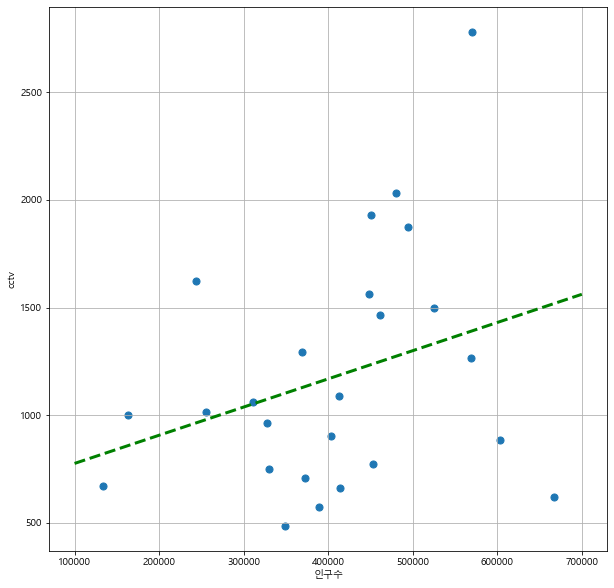

In [41]:
# 인구수와 소계 산점도, 회귀선 작성
# polyfit 최소제곱법을 이용한 상수값, 1 : 차수
fpl = np.polyfit(data_result['인구수'], data_result['소계'], 1)
# ㅣ 직선
f1 = np.poly1d(fpl)
fx = np.linspace(100000, 700000, 100)
plt.figure(figsize = (10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


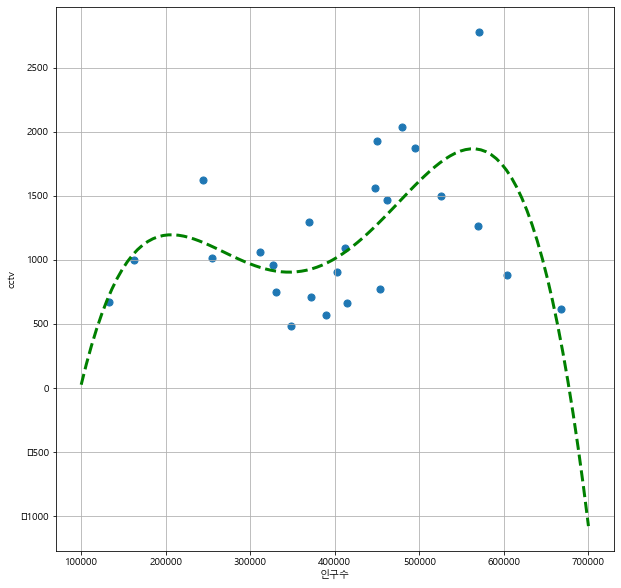

In [48]:
# 인구수와 소계 산점도, 회귀선 작성
# polyfit 최소제곱법을 이용한 상수값, 1 : 차수
fpl = np.polyfit(data_result['인구수'], data_result['소계'], 4)
# ㅣ 직선
f1 = np.poly1d(fpl) # 인구수에 맞는 y값
fx = np.linspace(100000, 700000, 100)
plt.figure(figsize = (10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [51]:
import numpy as np
x = np.array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])
y = np.array([4.23620563, 6.18696492, 2.83930821, 5.00923197,
             11.51299327, 12.91581993, 14.51838241, 14.34881875,
             18.13566499, 20.1408104, 21.9872241])
fit1 = np.polyfit(x, y, 1) # 2개 상수 (+ 절편)
fit2 = np.polyfit(x, y, 2) # 3개 상수 (+ 절편)
fit3 = np.polyfit(x, y, 3) # 4개 상수 (+ 절편)
print(fit1)
print(fit2)
print(fit3)

[1.92858279 2.34176099]
[0.05915413 1.33704154 3.22907288]
[-0.02808825  0.48047788 -0.26960637  4.24024989]


In [53]:
num = len(x)
for i in range(num) :
    fit1 = 1.92858279*x + 2.34176099
    fit2 = 0.05915413*x**2 + 1.33704154*x + 3.22907288
    fit3 = - 0.02808825*x**3 + 0.48047788*x**2 - 0.26960637*x + 4.24024989
print(fit3)

[ 4.24024989  4.42303315  5.39824267  6.99734895  9.05182249 11.39313379
 13.85275335 16.26215167 18.45279925 20.25616659 21.50372419]


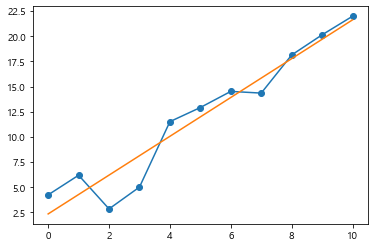

In [57]:
# xy 산점도 와 회귀선
plt.scatter(x, y)
plt.plot(x, y)
plt.plot(x, fit1)
plt.show()

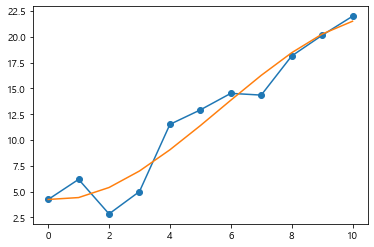

In [59]:
# xy 산점도 와 회귀선
plt.scatter(x, y)
plt.plot(x, y)
plt.plot(x, fit3)
plt.show()

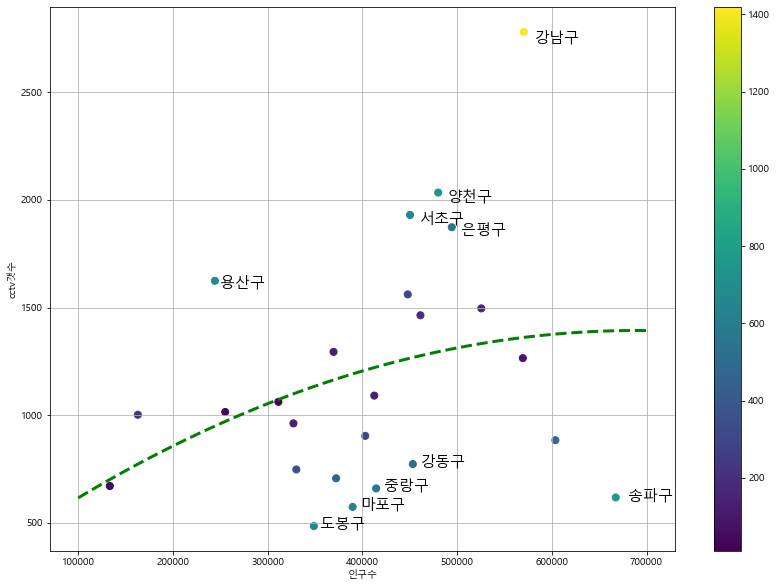

In [66]:
# 산점도 + 회귀선, 산점도에 색상을  회귀선과의 거리로 표시
# 회귀선을 위한 상수
fpl = np.polyfit(data_result['인구수'], data_result['소계'], 2)
# fpl상수값을 이용하여 y값을 계산하기 위한 함수
f1 = np.poly1d(fpl) 
# X축값, 10만 ~ 70만 까지 100등분
fx = np.linspace(100000, 700000, 100)
# data_result 인구수에 맞는 회귀선의 y값
# 절대값 
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by = '오차', ascending = False)

# 그래프 작성
plt.figure(figsize = (14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c =data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
# 점에 구 이름 표시
for n in  range(10) : # 라벨링 // 절대값 오차가 많은 구10개 정보 표시
    plt.text(df_sort['인구수'][n]*1.02, 
             df_sort['소계'][n]*0.98, # 약간 밑으로
            df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('cctv갯수')
plt.colorbar()
plt.grid()
plt.show()

In [70]:
# 구별 범죄율 분석
import numpy as np
import pandas as pd
crime_police = pd.read_csv('02. crime_in_Seoul.csv', 
                           thousands = ',', encoding = 'euc-kr')
crime_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [71]:
crime_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [72]:
police_state = pd.read_csv('경찰청_경찰관서 위치, 주소_20200409.csv',
                          thousands = ',', encoding = 'euc-kr')
police_state.head()

,청,서,지구대파출소,X좌표,Y좌표,주소
0,강원청,강릉경찰서,강동파출소,128.978300,37.727760,강원도 강릉시 강동면 안인리 764-1
1,강원청,강릉경찰서,강릉경찰서,128.906763,37.768700,강릉시 포남동 1113
2,강원청,강릉경찰서,남부지구대,128.897125,37.748968,강릉시 노암동 715-16
3,강원청,강릉경찰서,동부지구대,128.926315,37.774032,강릉시 송정동 740-3
4,강원청,강릉경찰서,북부지구대,128.875237,37.835265,강릉시 주문진읍 주문리 312-7
